# Trending Youtube Videos

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
import os
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pickle
from wordcloud import WordCloud
sns.set()
import scipy.stats as stats
import random 

<!-- Which channel had the most trending videos, likes, comments and dislikes
Which video had the most views , likes ,comments and dislikes?
Which video category raked up the most views, likes,comments and dislikes ?
Whether there’s a relationship between the views , comments and likes ?
Most common words used in video and channel titles -->

In [109]:
df_yt = pd.read_csv('USVideos.csv', index_col='video_id')

In [3]:
df_yt.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df_yt.columns.values

array(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype=object)

In [5]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40949 non-null  object
 1   title                   40949 non-null  object
 2   channel_title           40949 non-null  object
 3   category_id             40949 non-null  int64 
 4   publish_time            40949 non-null  object
 5   tags                    40949 non-null  object
 6   views                   40949 non-null  int64 
 7   likes                   40949 non-null  int64 
 8   dislikes                40949 non-null  int64 
 9   comment_count           40949 non-null  int64 
 10  thumbnail_link          40949 non-null  object
 11  comments_disabled       40949 non-null  bool  
 12  ratings_disabled        40949 non-null  bool  
 13  video_error_or_removed  40949 non-null  bool  
 14  description             40379 non-null  obj

In [6]:
df_yt.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
df_yt["channel_title"].value_counts()

ESPN                                       203
The Tonight Show Starring Jimmy Fallon     197
Vox                                        193
Netflix                                    193
TheEllenShow                               193
                                          ... 
onsetfacilities.com                          1
James Veitch                                 1
Jamie Demeter                                1
Movieclips Film Festivals & Indie Films      1
Alicia Keys                                  1
Name: channel_title, Length: 2207, dtype: int64

In [8]:
df_yt.isnull().sum()

trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [9]:
df_yt.columns = list(map(str, df_yt.columns))

## Clean Data

In [10]:
del_cols = ['thumbnail_link','comments_disabled','ratings_disabled', 'video_error_or_removed', 'description']
df_yt = df_yt.drop(del_cols, axis=1)

In [11]:
df_yt.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [12]:
df_yt = df_yt.drop_duplicates(keep = "first")

In [13]:
df_yt.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [14]:
df_yt['trending_date'] = pd.to_datetime(df_yt['trending_date'], format='%y.%m.%d', errors='ignore')
df_yt['publish_time'] = pd.to_datetime(df_yt['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='ignore')

In [15]:
df_yt.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [16]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trending_date  40901 non-null  object        
 1   title          40901 non-null  object        
 2   channel_title  40901 non-null  object        
 3   category_id    40901 non-null  int64         
 4   publish_time   40901 non-null  datetime64[ns]
 5   tags           40901 non-null  object        
 6   views          40901 non-null  int64         
 7   likes          40901 non-null  int64         
 8   dislikes       40901 non-null  int64         
 9   comment_count  40901 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 3.4+ MB


In [17]:
# cdf = df_yt["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
#             .to_frame().reset_index() \
#             .rename(columns={"index": "year", "trending_date": "Jumlah_Video"})

# fig, ax = plt.subplots()
# _ = sns.barplot(x="year", y="Jumlah_Video", data=cdf, 
#                 palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
# _ = ax.set(xlabel="Tahun", ylabel="Jumlah Video")

In [18]:
df_yt.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.000000,-0.168243,-0.173946,-0.033583,-0.076365
views,-0.168243,1.000000,0.849179,0.472216,0.617657
likes,-0.173946,0.849179,1.000000,0.447188,0.803088
dislikes,-0.033583,0.472216,0.447188,1.000000,0.700192
comment_count,-0.076365,0.617657,0.803088,0.700192,1.000000


In [19]:
df_yt.insert(4,'publish_date', df_yt['publish_time'].dt.date)
df_yt['publish_time'] = df_yt['publish_time'].dt.time

In [20]:
df_yt.head()

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count
video_id,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518


In [72]:
df_yt['category_id'] = df_yt['category_id'].astype(int)

In [73]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trending_date  40901 non-null  object        
 1   title          40901 non-null  object        
 2   channel_title  40901 non-null  object        
 3   category_id    40901 non-null  int32         
 4   category       40901 non-null  object        
 5   publish_date   40901 non-null  datetime64[ns]
 6   publish_time   40901 non-null  object        
 7   tags           40901 non-null  object        
 8   views          40901 non-null  int64         
 9   likes          40901 non-null  int64         
 10  dislikes       40901 non-null  int64         
 11  comment_count  40901 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(6)
memory usage: 5.2+ MB


In [81]:
df_yt["publish_date"] = pd.to_datetime(df_yt["publish_date"])

In [82]:
df_yt["publish_time"] = pd.to_datetime(df_yt["publish_date"], format='H%:M%')

In [83]:
df_yt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trending_date  40901 non-null  object        
 1   title          40901 non-null  object        
 2   channel_title  40901 non-null  object        
 3   category_id    40901 non-null  int32         
 4   category       40901 non-null  object        
 5   publish_date   40901 non-null  datetime64[ns]
 6   publish_time   40901 non-null  datetime64[ns]
 7   tags           40901 non-null  object        
 8   views          40901 non-null  int64         
 9   likes          40901 non-null  int64         
 10  dislikes       40901 non-null  int64         
 11  comment_count  40901 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(4), object(5)
memory usage: 5.2+ MB


In [84]:
df_categories = pd.read_json('US_category_id.json')

In [85]:
df_categories

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [26]:
id_to_category = {}
for category in df_categories['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [27]:
df_yt.insert(4, 'category', df_yt['category_id'].map(id_to_category))

In [28]:
def top5(column_of_interest,column_stats):
    df = df_yt.groupby(column_of_interest)['views', 'likes', 'dislikes', 'comment_count'].apply(lambda x: x.astype(int).sum())
    return df.sort_values(by=column_stats, ascending=False).head()
def visualize_top5(column_of_interest, column_stats):
    df_most_viewed = df_yt.groupby([column_of_interest])[column_stats].sum().reset_index()
    df_sorted = df_most_viewed.sort_values(column_stats, ascending=False).iloc[:5]
    ax = sorted_df.plot.bar(figsize = (15,15))
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df[column_of_interest]:
        labels.append(item[:20] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=12)
    plt.show()

## The 5 most viewed trending videos

In [87]:
df_mviewed = top5('title', 'views')
df_mviewed

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
title,,,,
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
"Becky G, Natti Natasha - Sin Pijama (Official Video)",1182971286,19185287,1616616,1176862
VENOM - Official Trailer (HD),1003151226,23339807,831784,2533352


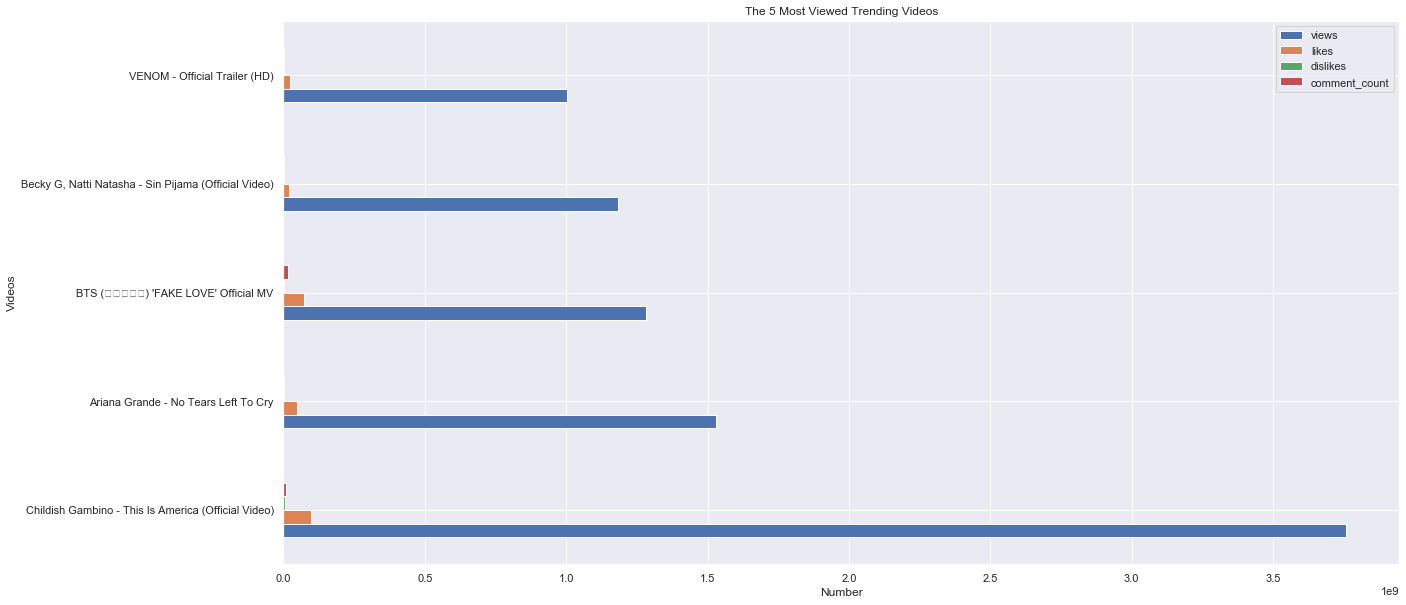

In [90]:
df_mviewed.plot(kind='barh', figsize=(20, 10))

plt.title('The 5 Most Viewed Trending Videos')
plt.ylabel('Videos')
plt.xlabel('Number')

plt.show()

## The 5 most liked videos

In [30]:
top5('title', 'likes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
title,,,,
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
Ariana Grande - No Tears Left To Cry,1529291326,49451353,1877988,4143608
Taylor Swift - Delicate,728576946,24868764,1413970,2210876
VENOM - Official Trailer (HD),1003151226,23339807,831784,2533352


## The 5 most commented videos

In [31]:
top5('title', 'comment_count')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
title,,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,1283188291,71835050,2389776,15568561
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
So Sorry.,204298706,8495733,9192539,8190045
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,780801040,19781372,10111153,5898529
Suicide: Be Here Tomorrow.,157627870,14271026,3239399,4710338


## The 5 most disliked videos

In [32]:
top5('title', 'dislikes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
title,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,780801040,19781372,10111153,5898529
So Sorry.,204298706,8495733,9192539,8190045
Childish Gambino - This Is America (Official Video),3758488765,96700818,6054434,10151289
Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,243774929,8844405,5240006,3590220
Suicide: Be Here Tomorrow.,157627870,14271026,3239399,4710338


In [33]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS

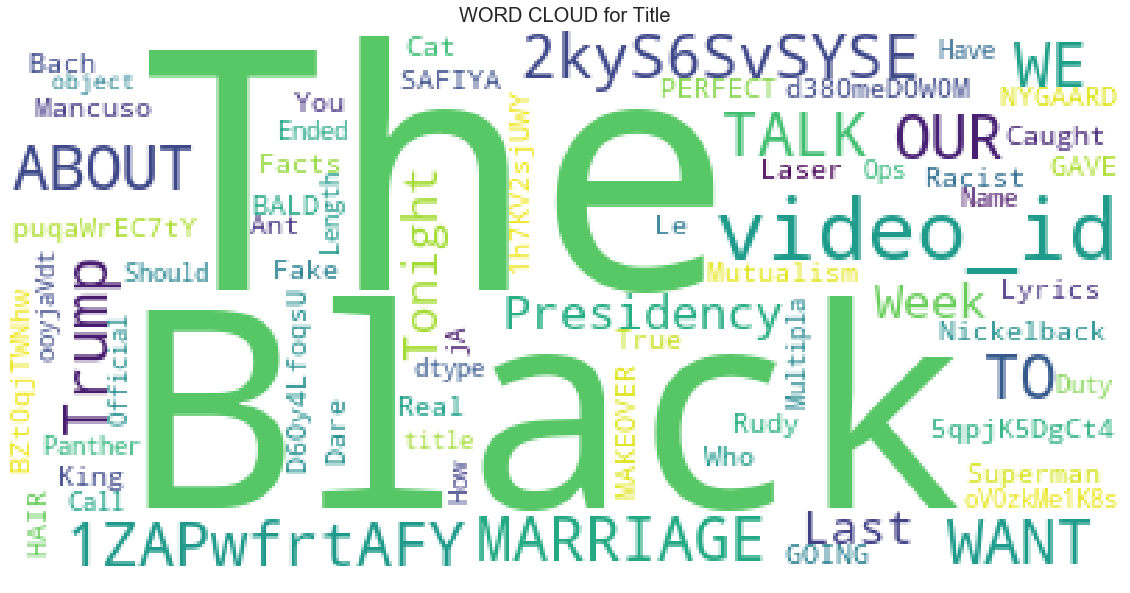

In [35]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', 
                      stopwords = stopwords, 
                      max_words = 1000, 
                      max_font_size = 120, 
                      random_state = 42).generate(str(df_yt['title']))

plt.imshow(wordcloud)

plt.title('WORD CLOUD for Title', fontsize = 20)
plt.axis('off')
plt.show()

# Channel Spesific

## The 5 most viewed channels

In [36]:
top5('channel_title', 'views')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
channel_title,,,,
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
ibighit,2235906679,199247121,3467306,31817464
Dude Perfect,1870085178,60275557,1501477,4009163
Marvel Entertainment,1808998971,55873344,1031250,6453560
ArianaGrandeVevo,1576959172,52170970,1931230,4295333


## The 5 most liked channels

In [37]:
top5('channel_title', 'likes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
channel_title,,,,
ibighit,2235906679,199247121,3467306,31817464
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
Dude Perfect,1870085178,60275557,1501477,4009163
Marvel Entertainment,1808998971,55873344,1031250,6453560
ArianaGrandeVevo,1576959172,52170970,1931230,4295333


## The 5 most commented channels

In [38]:
top5('channel_title', 'comment_count')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
channel_title,,,,
ibighit,2235906679,199247121,3467306,31817464
Logan Paul Vlogs,484356303,31545290,13847251,14870370
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
jypentertainment,1486972132,44900910,2482131,7575510
YouTube Spotlight,791388476,20173324,10924092,6495154


## The 5 most disliked channels

In [39]:
top5('channel_title', 'dislikes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
channel_title,,,,
Logan Paul Vlogs,484356303,31545290,13847251,14870370
YouTube Spotlight,791388476,20173324,10924092,6495154
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
Call of Duty,315404711,11553594,5644083,4224430
ibighit,2235906679,199247121,3467306,31817464


## Top 5 channels with the most trending videos

In [40]:
df_yt["channel_title"].value_counts().head()

ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       192
TheEllenShow                              192
Name: channel_title, dtype: int64

## The 5 most viewed categories (Spesific)

In [41]:
top5('category', 'views')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
category,,,,
Music,40126286541,1416572741,51173364,125275820
Entertainment,20561101882,529233220,42904603,73448375
Film & Animation,7267792432,165604731,6071246,17877359
Comedy,5111266590,216136310,7219986,22496604
People & Blogs,4910004664,186350335,10178864,24759019


## The 5 most likes categories (Spesific)

In [42]:
top5('category', 'likes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
category,,,,
Music,40126286541,1416572741,51173364,125275820
Entertainment,20561101882,529233220,42904603,73448375
Comedy,5111266590,216136310,7219986,22496604
People & Blogs,4910004664,186350335,10178864,24759019
Film & Animation,7267792432,165604731,6071246,17877359


## The 5 most disliked (Spesific)

In [43]:
top5('category', 'dislikes')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
category,,,,
Music,40126286541,1416572741,51173364,125275820
Entertainment,20561101882,529233220,42904603,73448375
People & Blogs,4910004664,186350335,10178864,24759019
Gaming,2127799781,68779564,9161661,14720836
Comedy,5111266590,216136310,7219986,22496604


## The 5 most comment (Spesific)

In [44]:
top5('category', 'comment_count')

C:\Users\TITIS PRADHITYA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,dislikes,comment_count
category,,,,
Music,40126286541,1416572741,51173364,125275820
Entertainment,20561101882,529233220,42904603,73448375
People & Blogs,4910004664,186350335,10178864,24759019
Howto & Style,4071011870,162515891,5462302,23095757
Comedy,5111266590,216136310,7219986,22496604


## Kategori VS Jumlah Video Trending

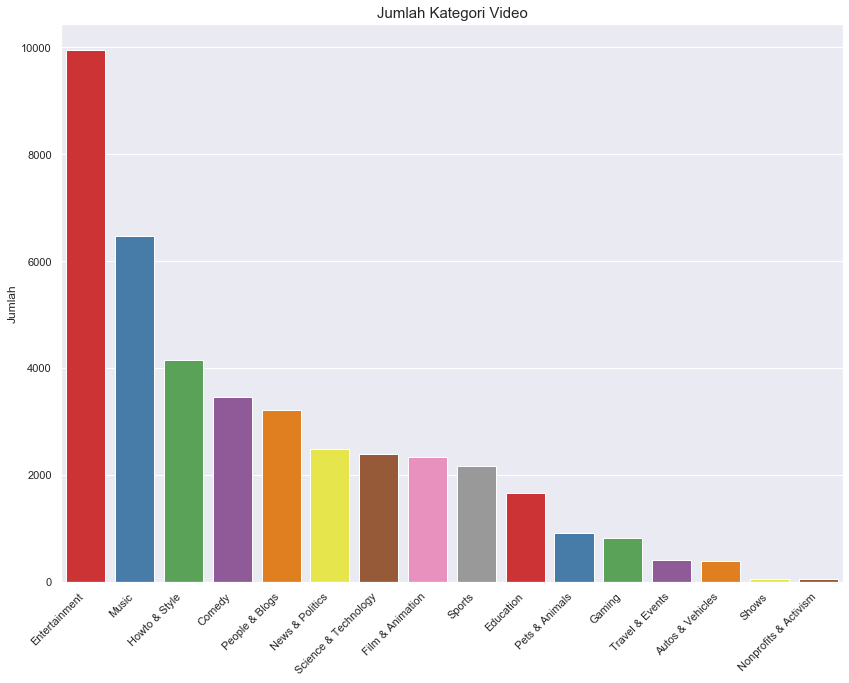

In [45]:
plt.figure(figsize = (14,10))
g = sns.countplot('category', data = df_yt, palette="Set1", order = df_yt['category'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Jumlah Kategori Video", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Jumlah", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

In [46]:
columns_of_interest = ['views', 'likes', 'dislikes', 'comment_count']
corr_matrix = df_yt[columns_of_interest].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849179,0.472216,0.617657
likes,0.849179,1.000000,0.447188,0.803088
dislikes,0.472216,0.447188,1.000000,0.700192
comment_count,0.617657,0.803088,0.700192,1.000000


In [47]:
# wordcloud_column("description")

In [106]:
# fig, ax = plt.subplots(figsize=(15,15))
# heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# cbar_min = corr_matrix.min().min()
# cbar_max = corr_matrix.max().max()
# cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# labels = ['']
# for column in columns_of_interest:
#     labels.append(column)
#     labels.append('')
# ax.set_yticklabels(labels, minor=False)
# ax.set_xticklabels(labels, minor=False)
# plt.show()

## Classification

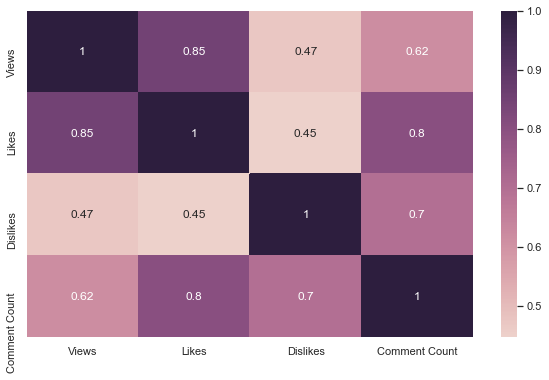

In [49]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_yt.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_yt.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [50]:
title_words = list(df_yt["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11440),
 ('|', 10649),
 ('The', 5757),
 ('the', 3607),
 ('a', 2563),
 ('to', 2341),
 ('of', 2335),
 ('in', 2171),
 ('A', 2119),
 ('&', 2020),
 ('I', 1937),
 ('and', 1915),
 ('Video)', 1900),
 ('Trailer', 1867),
 ('How', 1660),
 ('with', 1654),
 ('2018', 1610),
 ('(Official', 1592),
 ('Official', 1553),
 ('on', 1550),
 ('To', 1395),
 ('You', 1251),
 ('My', 1079),
 ('for', 1019),
 ('ft.', 1016)]

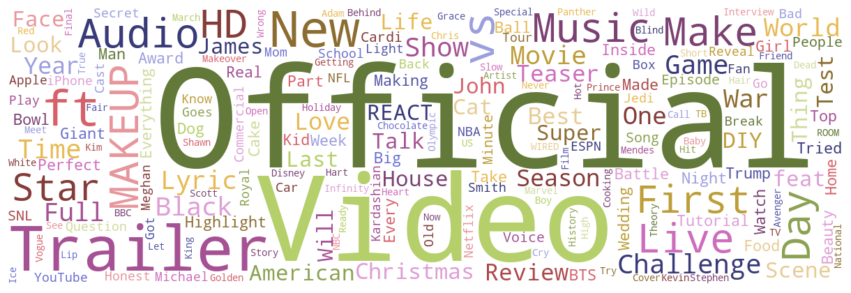

In [51]:
wc = WordCloud(width=1200, height=400, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

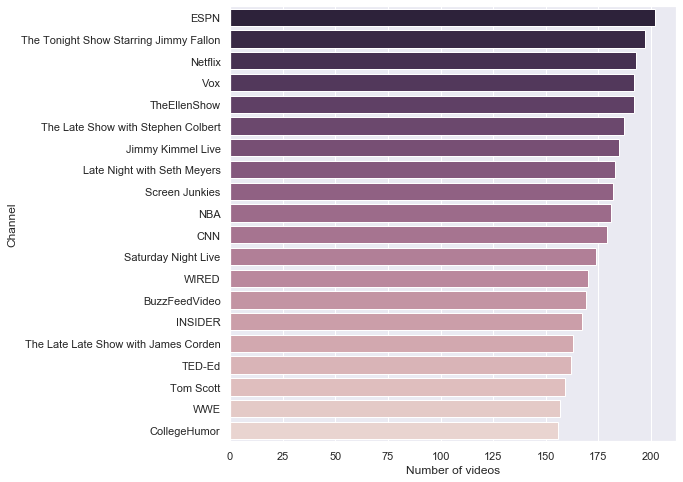

In [52]:
cdf = df_yt.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Number of videos", ylabel="Channel")

In [53]:
!pip install seaborn

In [54]:
import seaborn as sns

In [55]:
df_yt["channel_title"].value_counts()

ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       192
TheEllenShow                              192
                                         ... 
edlover4real                                1
onsetfacilities.com                         1
James Veitch                                1
Jamie Demeter                               1
Alicia Keys                                 1
Name: channel_title, Length: 2207, dtype: int64

In [56]:
df_yt.iloc[1]

trending_date                                             17.14.11
title            The Trump Presidency: Last Week Tonight with J...
channel_title                                      LastWeekTonight
category_id                                                     24
category                                             Entertainment
publish_date                                   2017-11-13 00:00:00
publish_time                                              07:30:00
tags             last week tonight trump presidency|"last week ...
views                                                      2418783
likes                                                        97185
dislikes                                                      6146
comment_count                                                12703
Name: 1ZAPwfrtAFY, dtype: object

In [57]:
df_yt.groupby("channel_title", sort=False)["views"].sum()

channel_title
CaseyNeistat                232745266
LastWeekTonight              97556377
Rudy Mancuso                240999117
Good Mythical Morning       142231380
nigahiga                    582326628
                              ...    
HALO                          6849514
Ben Kronengold                8216537
All Def Digital               1807153
How It Should Have Ended     16880390
Ubisoft North America         1593483
Name: views, Length: 2207, dtype: int64

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
x = df_yt['views'].values.reshape(-1,1)
y = df_yt['likes'].values.reshape(-1,1)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [98]:
model = LinearRegression()

In [99]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
model.score(x_test, y_test)

0.6758152025890306

In [101]:
y_pred = model.predict(x_test)

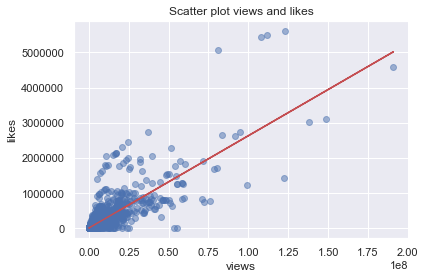

In [103]:
plt.scatter(x_test, y_test, alpha=0.5)
plt.plot(x_test, y_pred, c='r')
plt.title('Scatter plot views and likes')
plt.xlabel('views')
plt.ylabel('likes')

plt.show()

In [66]:
df_yt.shape

(40901, 12)